In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the CSV and Perform Basic Data Cleaning

In [3]:
df = pd.read_csv("exoplanet_data.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()

### Select your features (columns)

In [4]:
# Dropped variables that are highly correlated

X = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_impact', 'koi_impact_err1', 'koi_duration', 'koi_duration_err1',
       'koi_depth', 'koi_depth_err1', 'koi_teq', 'koi_insol', 'koi_model_snr',
       'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'ra', 'dec',
       'koi_kepmag']]

y = df['koi_disposition']

### Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Scaling the input variables

In [6]:
# Create a StandardScater model and fit it to the training data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaler = scaler.fit(X_train)

# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)

X_test_scaled = X_scaler.transform(X_test)

### K Nearest Neighbors

k: 1, Train/Test Score: 1.000/0.786
k: 3, Train/Test Score: 0.896/0.811
k: 5, Train/Test Score: 0.870/0.812
k: 7, Train/Test Score: 0.863/0.817
k: 9, Train/Test Score: 0.857/0.819
k: 11, Train/Test Score: 0.850/0.821
k: 13, Train/Test Score: 0.847/0.820
k: 15, Train/Test Score: 0.840/0.822
k: 17, Train/Test Score: 0.842/0.818
k: 19, Train/Test Score: 0.841/0.820


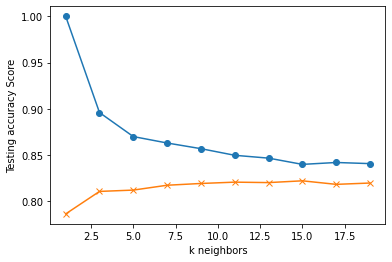

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties

train_scores = []

test_scores = []

for k in range(1, 20, 2):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train_scaled, y_train)
    
    train_score = knn.score(X_train_scaled, y_train)
    
    test_score = knn.score(X_test_scaled, y_test)
    
    train_scores.append(train_score)
    
    test_scores.append(test_score)
    
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')

plt.plot(range(1, 20, 2), test_scores, marker="x")

plt.xlabel("k neighbors")

plt.ylabel("Testing accuracy Score")

plt.show()

In [8]:
# K = 15 appears to be the best

knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=15)

### Prediction and Evaluation of Model

In [9]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = knn.predict(X_test_scaled)

In [10]:
# Confusion Matrix

print(confusion_matrix(y_test,predictions))

[[ 254  251   10]
 [ 100  414   11]
 [   1    0 1057]]


In [11]:
# Classification report

print(classification_report(y_test,predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.72      0.49      0.58       515
     CONFIRMED       0.62      0.79      0.70       525
FALSE POSITIVE       0.98      1.00      0.99      1058

      accuracy                           0.82      2098
     macro avg       0.77      0.76      0.76      2098
  weighted avg       0.83      0.82      0.82      2098



### SAVE THE MODEL

In [12]:
import joblib

filename = 'KNN_model.sav'

joblib.dump(knn, filename)

['KNN_model.sav']

In [27]:
pred = pd.DataFrame(predictions,columns=['Predicted'])

Resp = pd.DataFrame(list(y_test),columns=['Response'])

Output = pd.merge(Resp, pred, left_index=True, right_index=True)

Output.to_excel('KNN_Predictions.xlsx')